# PREPROCESSING AND EDA PART 2

## CONTENTS

__1.LIBRARIES AND DATA__
       
__2.SCATTERPLOTS__

__3.BOXPLOTS__
             
__4.CORRELATION MATRIX__

__5. PCA (DIMENSIONS' REDUCTION)__

__6. TRAIN-TEST SPLIT__


## 1. LIBRARIES AND DATA

__Libraries__

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random as rndm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

__Importing data__

In [2]:
data = pd.read_csv("cancer_reg_refined.csv") 
cancer_df = data.copy()
cancer_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,93564.75,39.3,...,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,0,1
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,49534.00,33.0,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,0,1


## 2. SCATTERPLOTS

In [3]:
# Creating a palette for the plots
color_list = ["firebrick", "red", "orangered", "chocolate", "sandybrown", "darkorange", "orange", "gold", "limegreen",
                  "deepskyblue", "navy", "darkorchid", "magenta", "greenyellow", "yellowgreen", "forestgreen", "lime",
                  "lightseagreen", "cyan", "dodgerblue", "crimson", "deeppink", "purple", "blue",
                  "salmon", "olive", "teal", "skyblue", "indigo", "brown", "sienna", "peru", "maroon", "tan"]

In [4]:
# Taking a small sample to create visualizations. We use the sample in order to make the visualizations more distinct.
sample = cancer_df.sample(axis= 0, frac = 0.15, random_state=126)
sample.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
398,104.0,46,170.4,401.9,38504,22633,21.5,0.000000,38888.25,34.0,...,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
89,20.0,10,187.4,400.6,43883,3091,12.1,0.000000,43962.70,49.5,...,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0
222,575.0,235,181.3,480.2,47185,73486,16.2,136.080342,46611.30,50.1,...,45.6,21.0,88.089285,0.917165,1.480724,0.821857,47.163245,5.956138,0,1
2402,46.0,19,181.3,475.5,46501,6205,13.1,0.000000,46611.30,43.7,...,37.6,17.5,95.879607,0.209239,0.611621,1.738291,55.575802,5.024311,0,0
1739,954.0,327,146.5,397.9,89861,309697,4.9,129.158500,93564.75,36.1,...,14.8,6.2,87.621825,3.568358,5.348661,0.907175,62.297581,5.756462,0,0


In [5]:
# Getting the names of the numeric columns
Independent_variables = list(sample.columns)
Independent_variables.remove('TARGET_deathRate')
Independent_variables.remove('binnedInc')
Independent_variables.remove('Geography_WEST')
Independent_variables.remove('Geography_EAST')
Independent_variables

['avgAnnCount',
 'avgDeathsPerYear',
 'incidenceRate',
 'medIncome',
 'popEst2015',
 'povertyPercent',
 'studyPerCap',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'AvgHouseholdSize',
 'PercentMarried',
 'PctNoHS18_24',
 'PctHS18_24',
 'PctBachDeg18_24',
 'PctHS25_Over',
 'PctBachDeg25_Over',
 'PctEmployed16_Over',
 'PctUnemployed16_Over',
 'PctPrivateCoverage',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctWhite',
 'PctBlack',
 'PctAsian',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate']

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


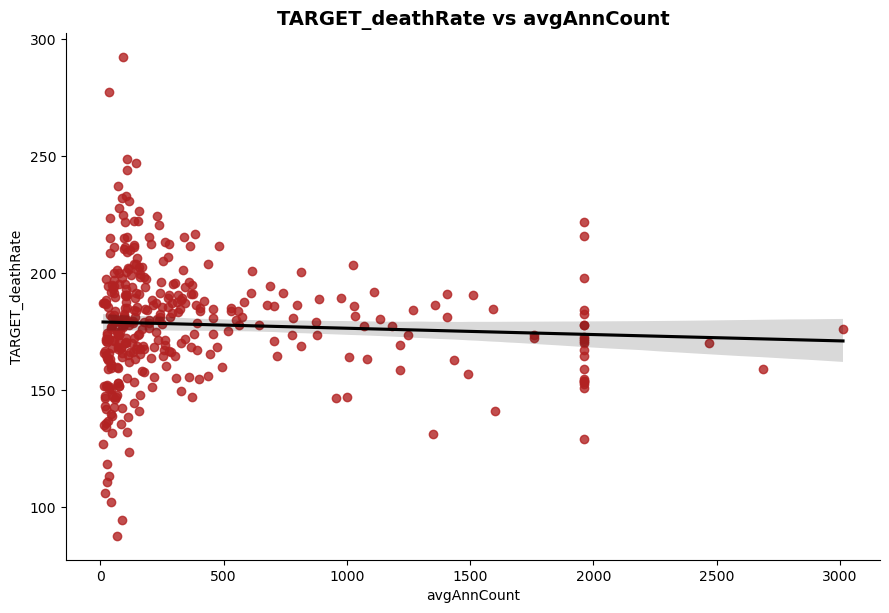

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


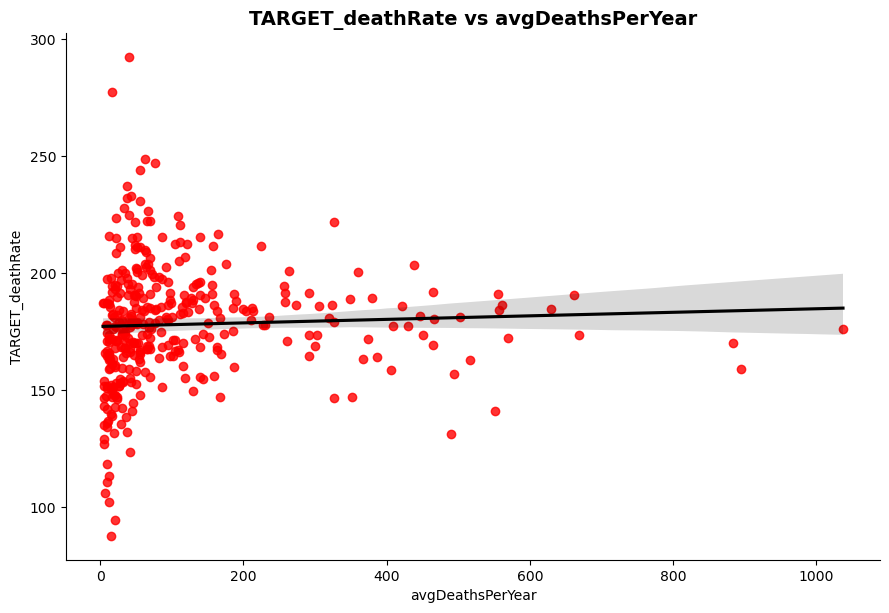

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


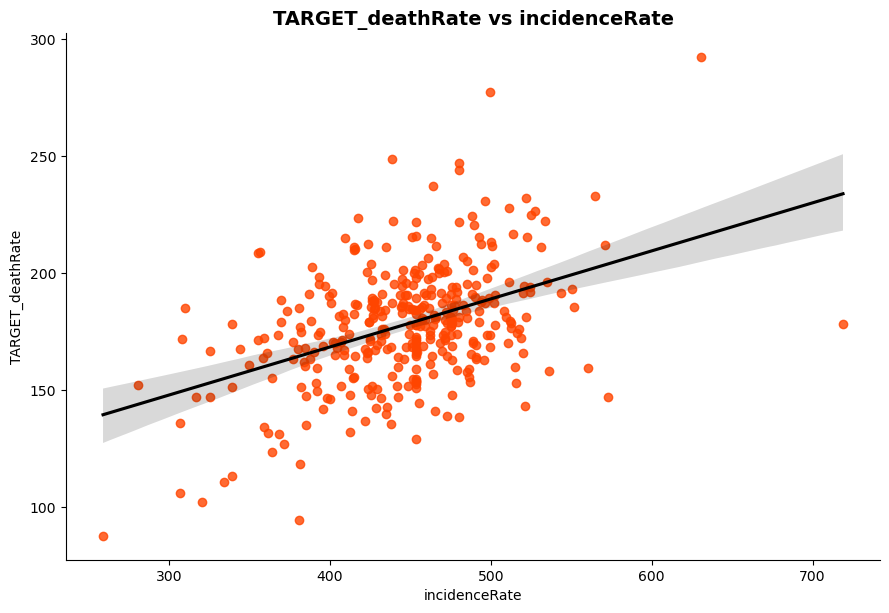

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


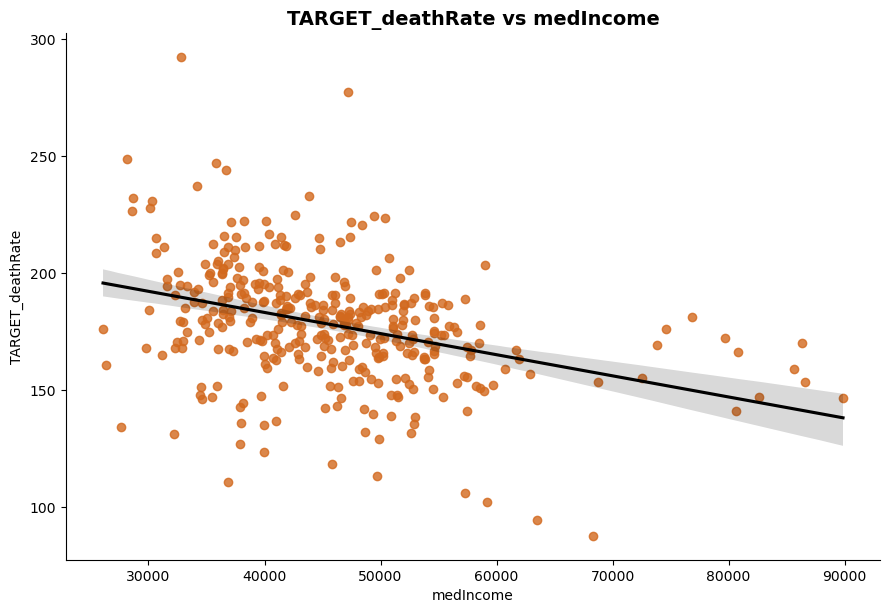

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


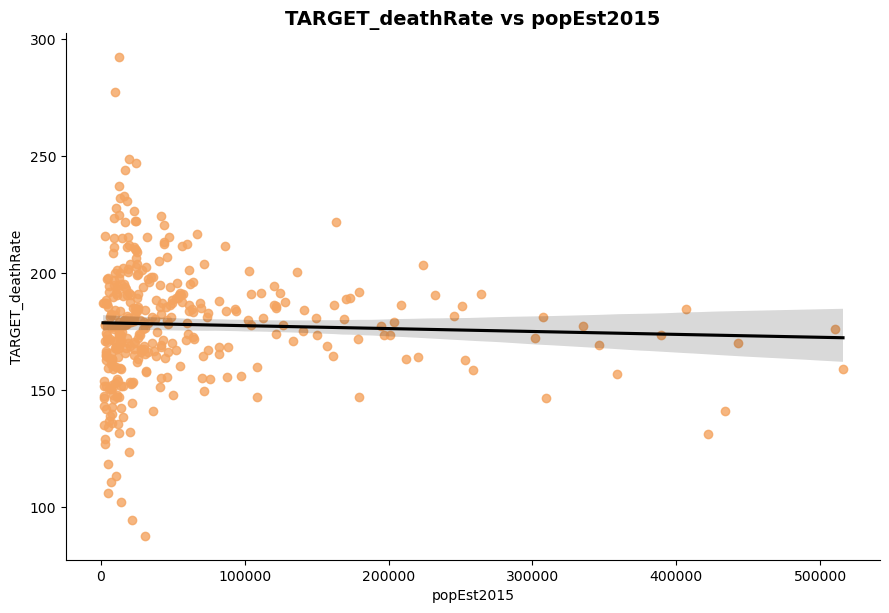

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


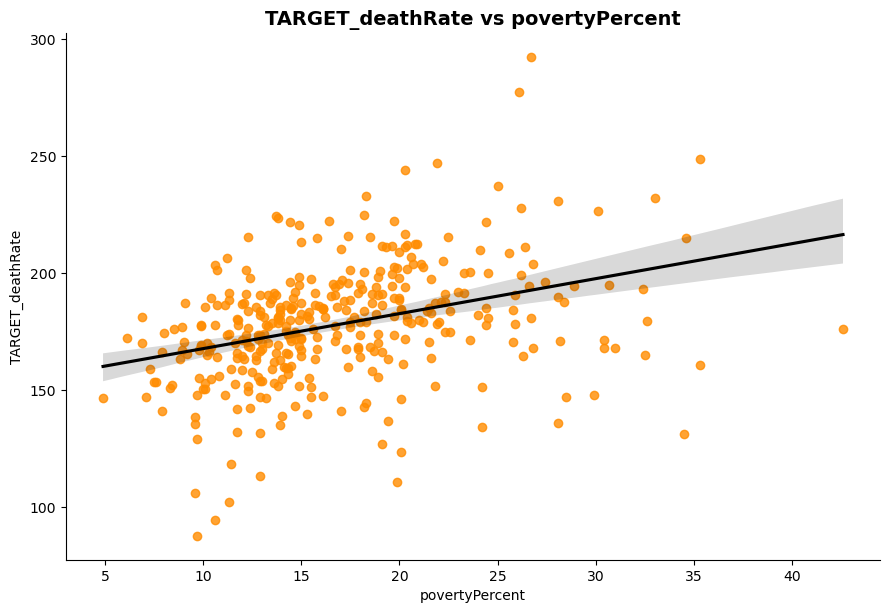

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


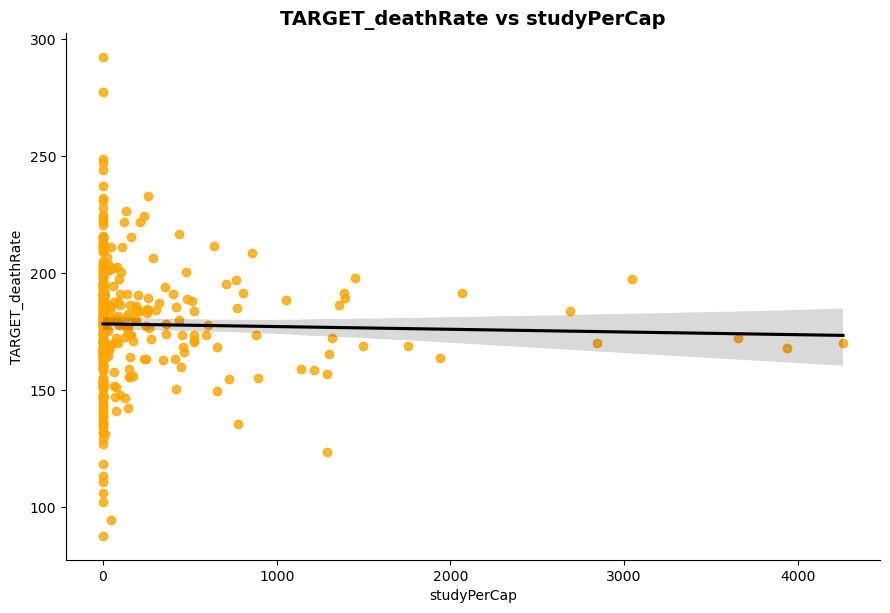

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


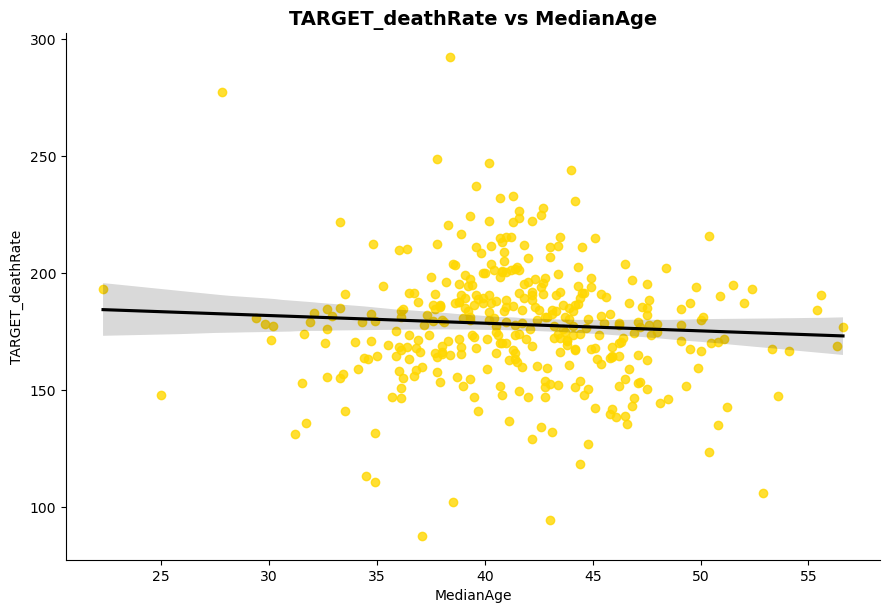

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


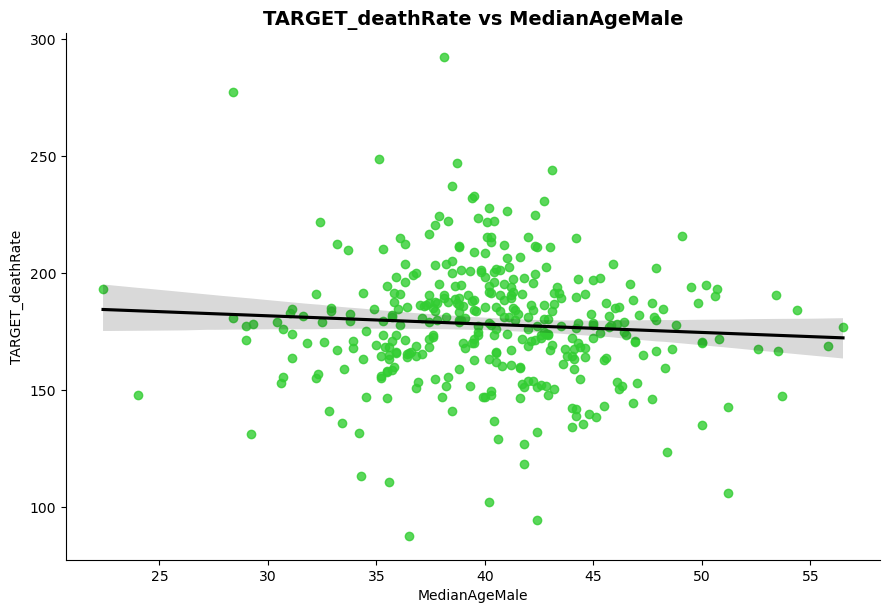

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


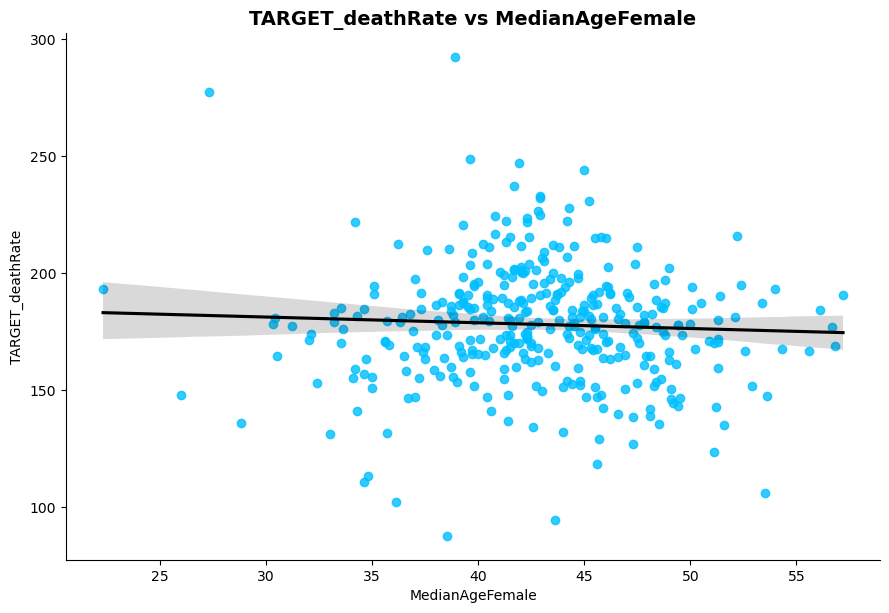

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


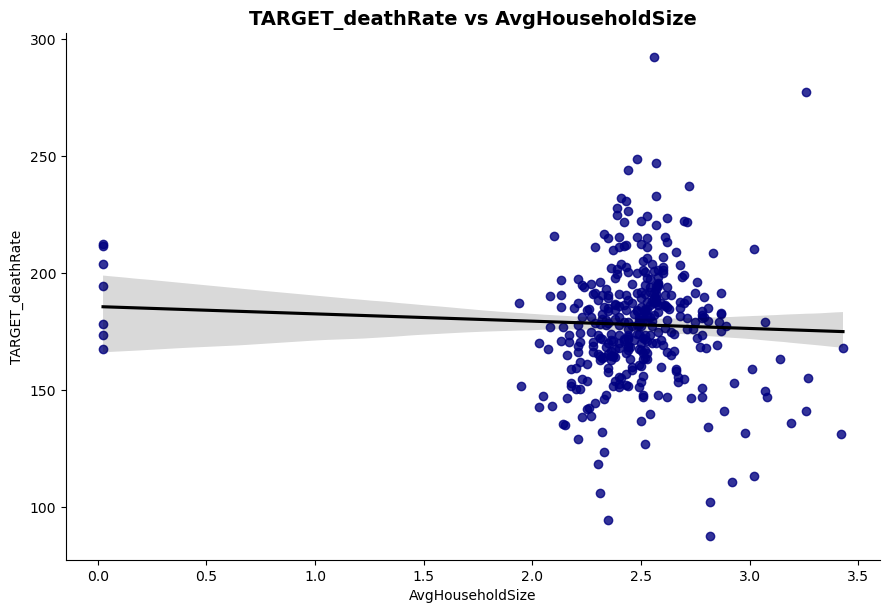

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


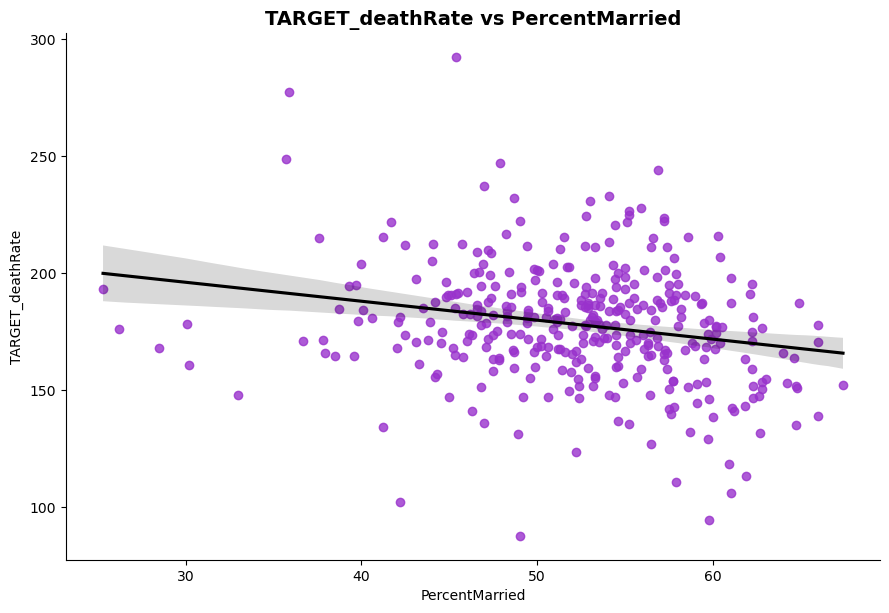

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


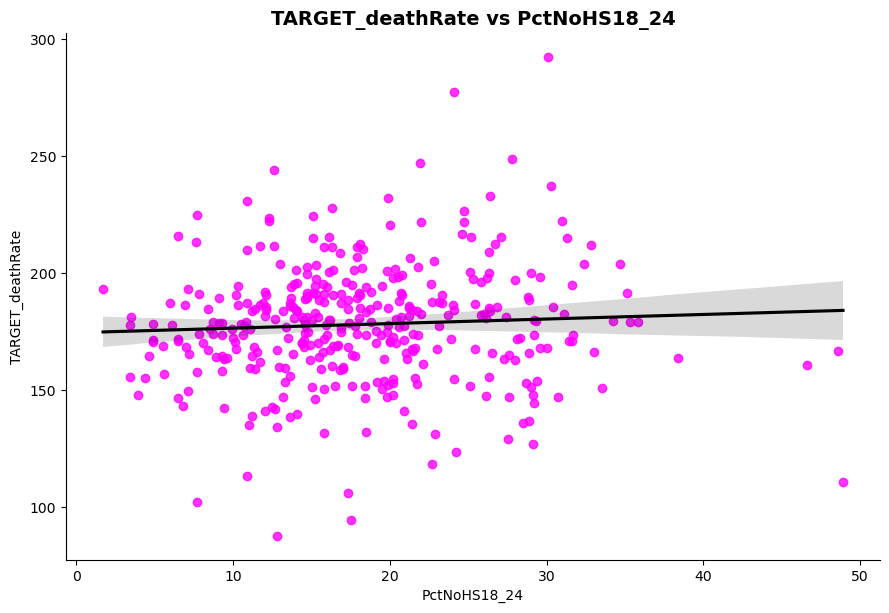

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


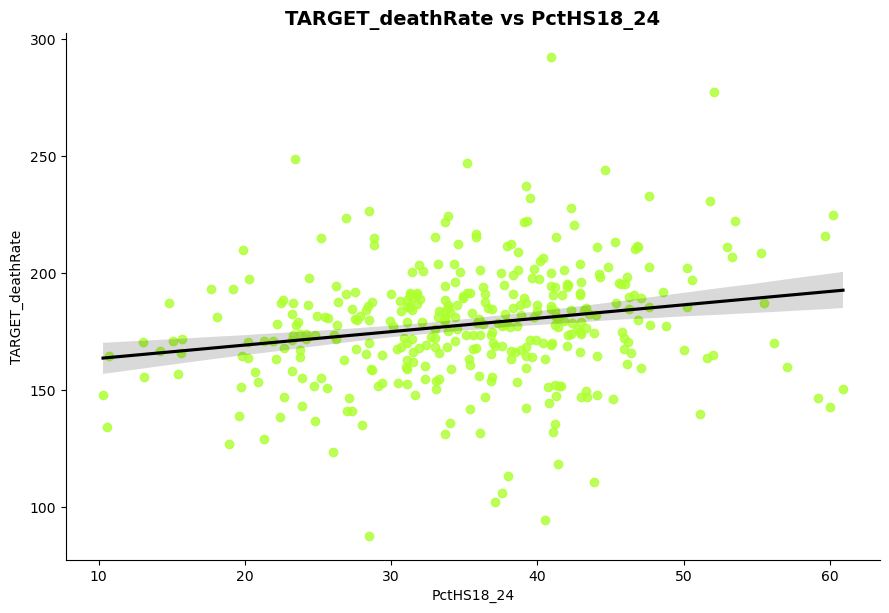

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


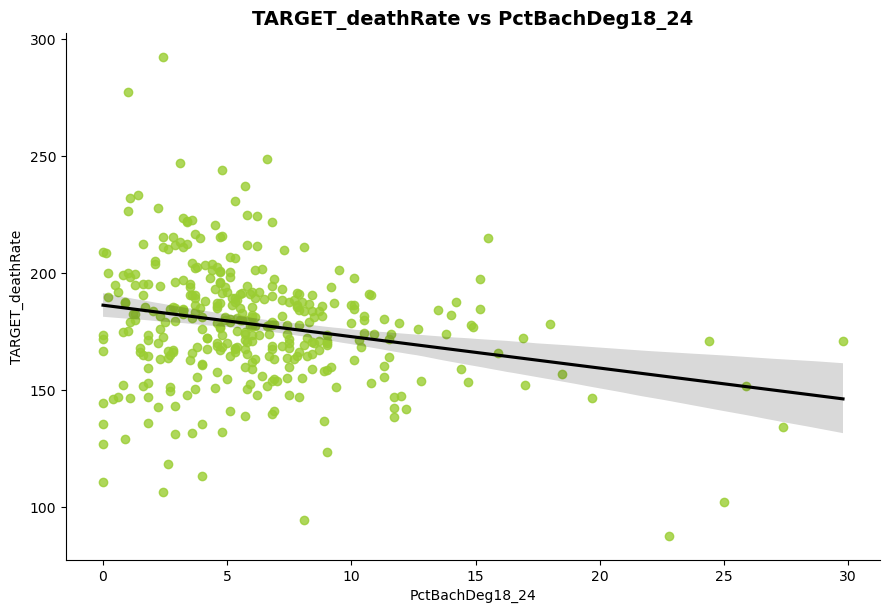

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


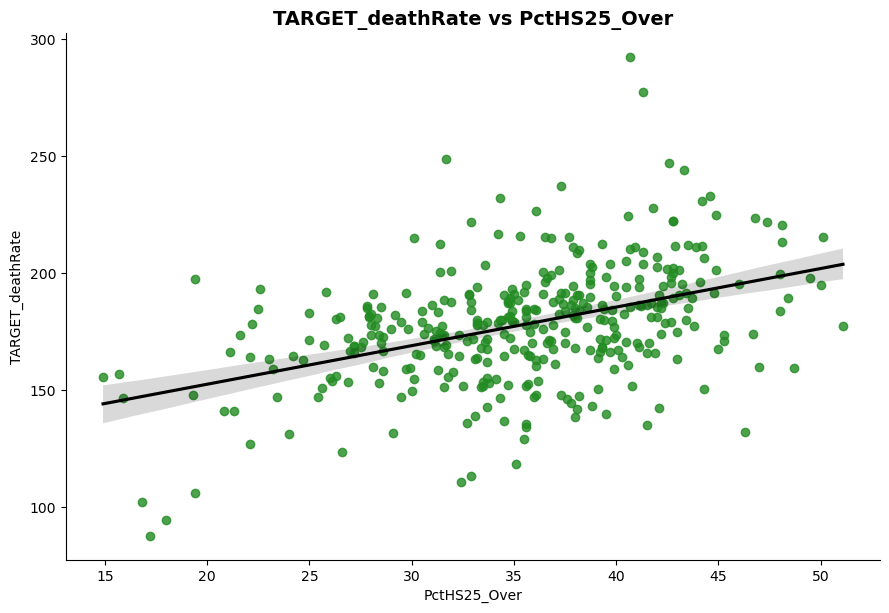

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


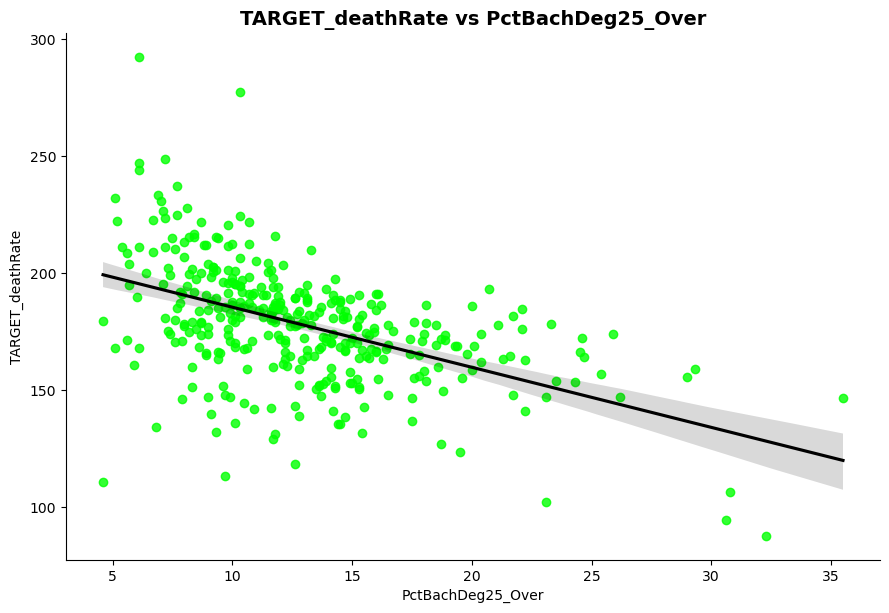

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


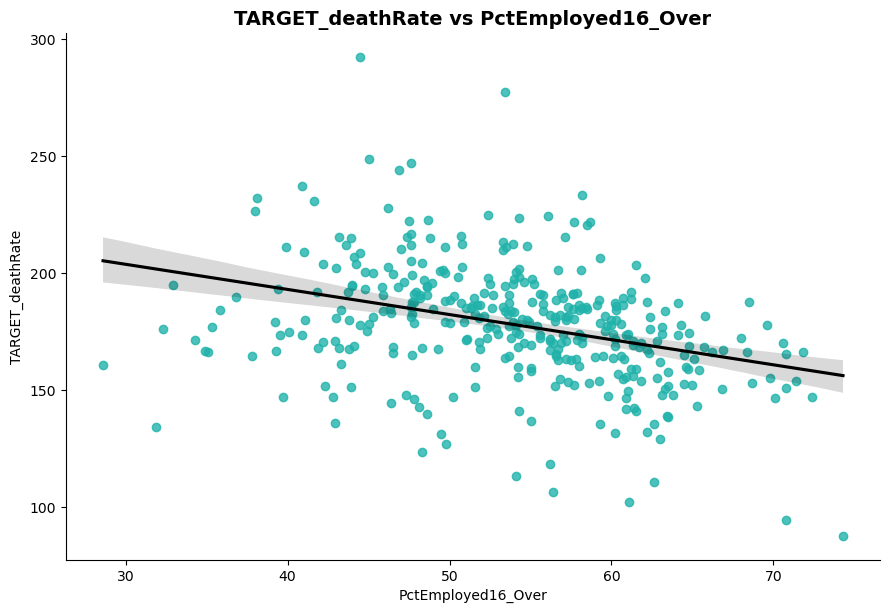

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


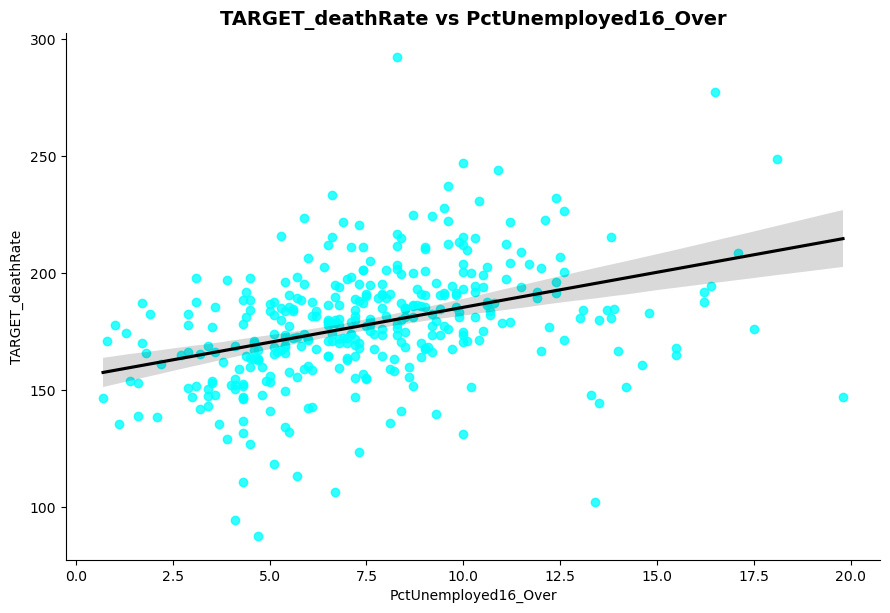

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


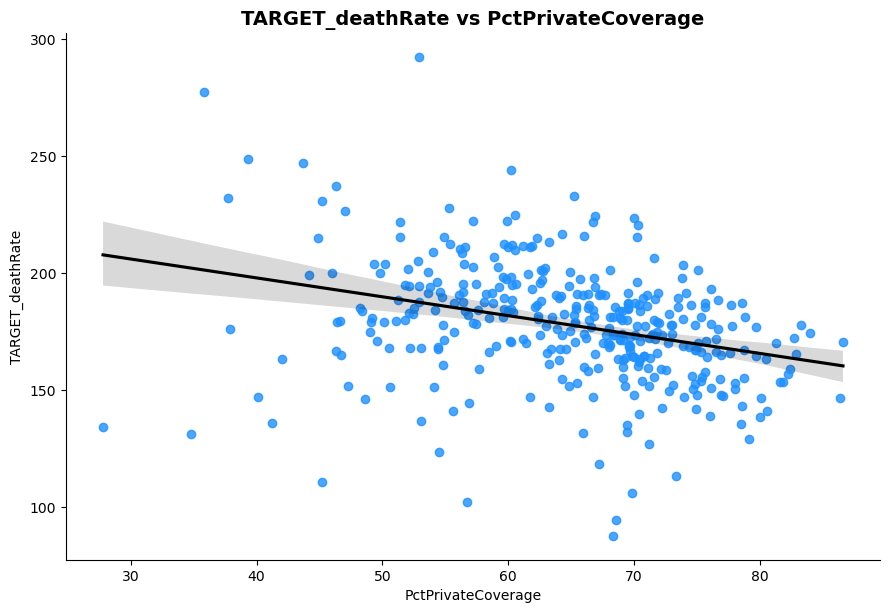

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


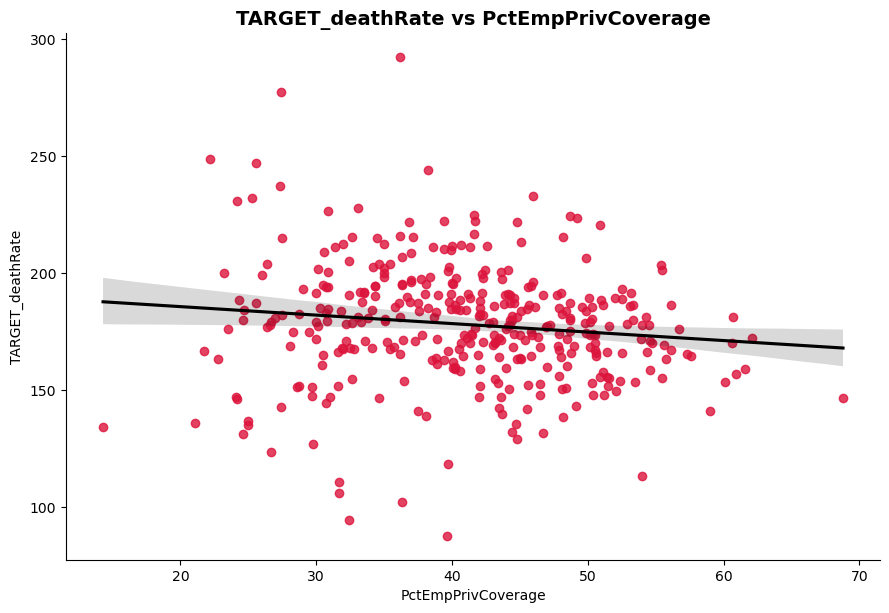

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


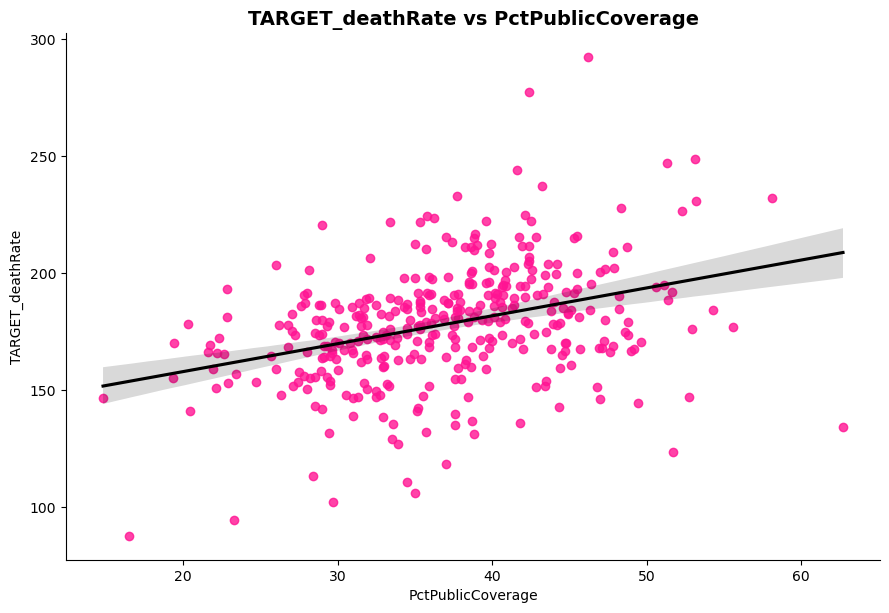

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


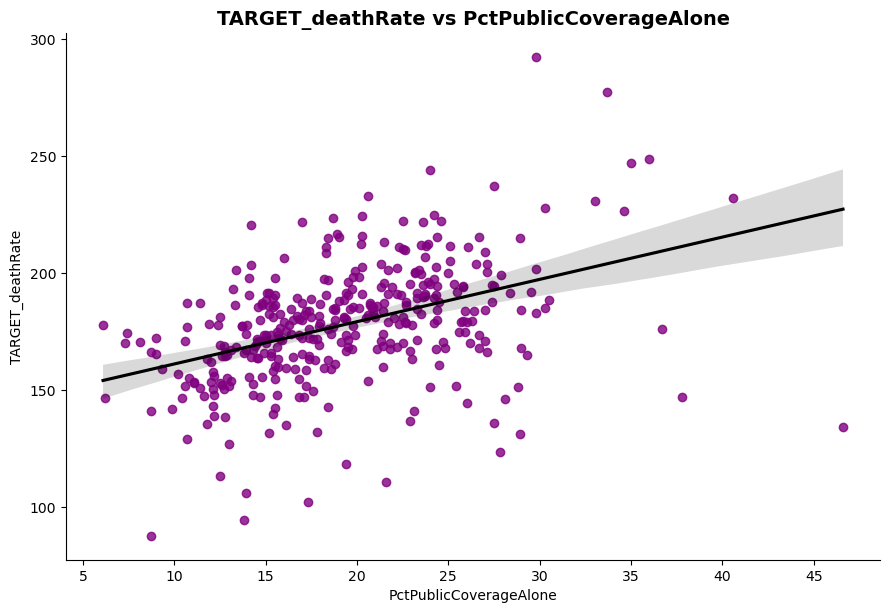

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


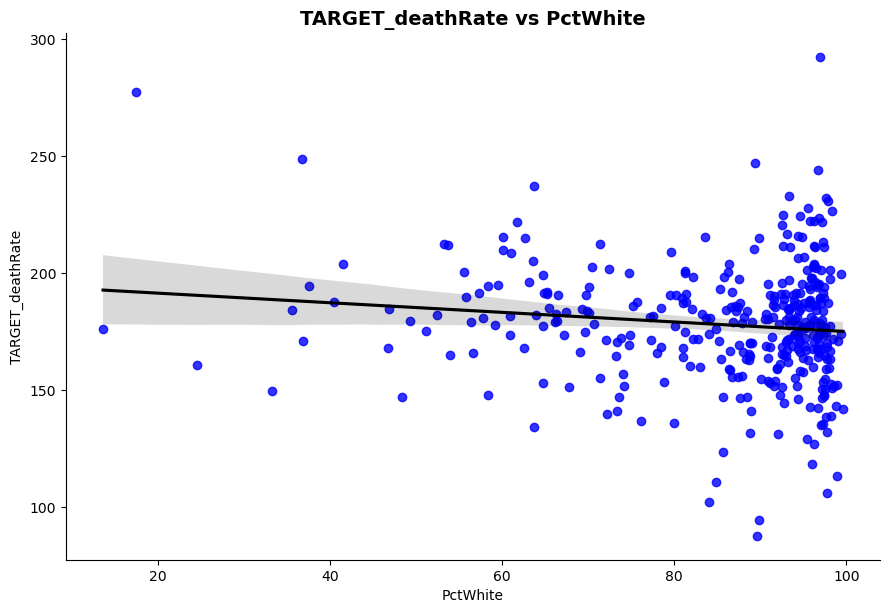

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


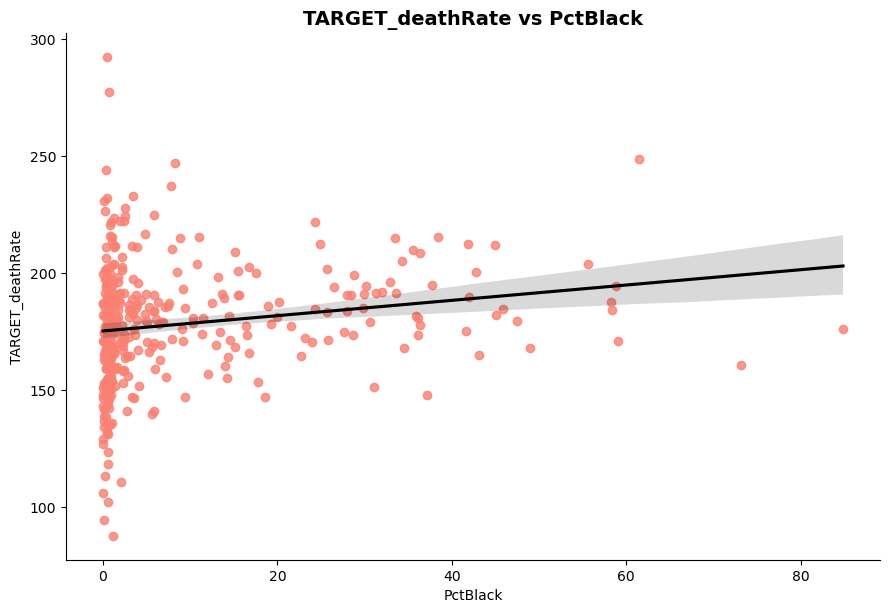

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


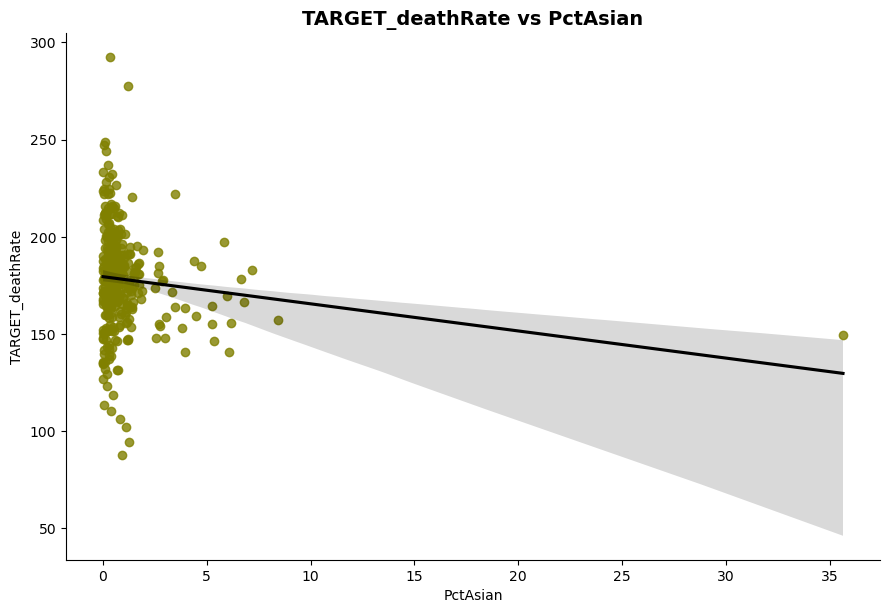

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


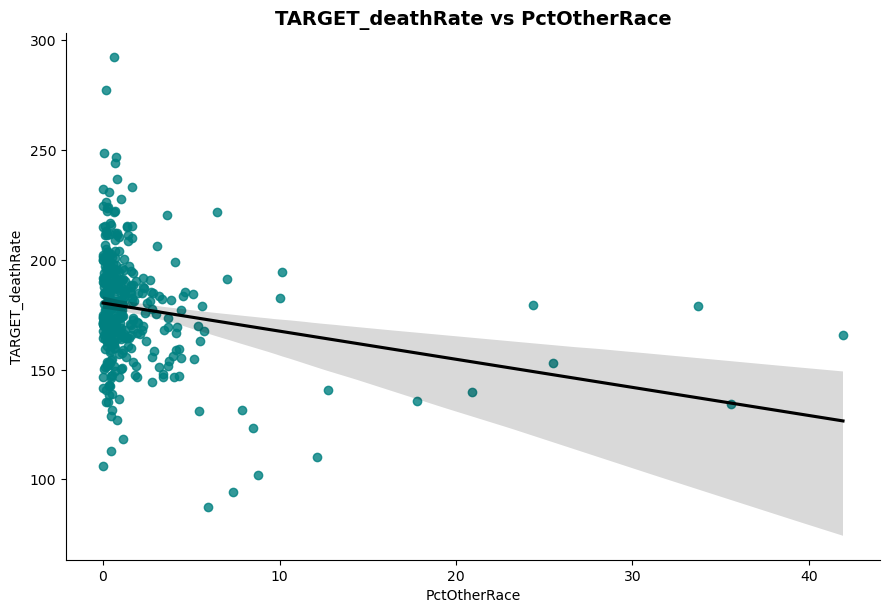

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


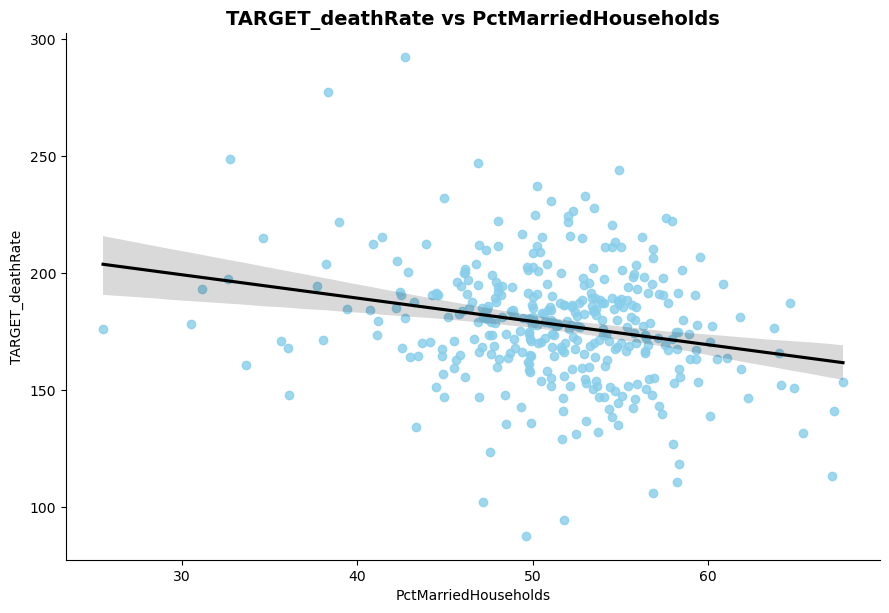

C:\Users\Constantine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


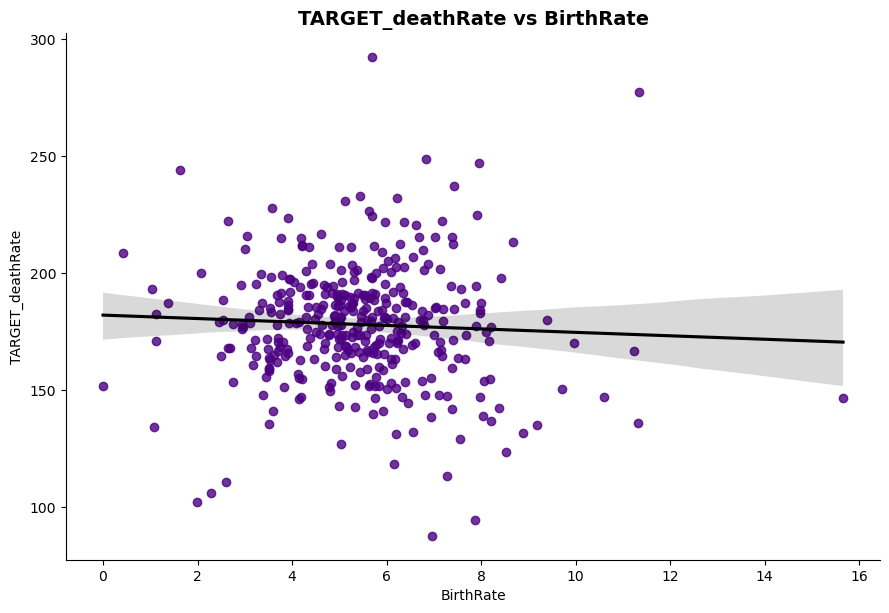

In [6]:
# Displaying scatterplots with fitted line with the target variable and each one of the numeric predictors.
for i in range(0,len(Independent_variables)):
    
    x = sample[Independent_variables[i]]
    y = sample['TARGET_deathRate']
   

    sns.lmplot(x = Independent_variables[i], y = 'TARGET_deathRate' ,data = sample, height = 6, aspect = 1.5,
               scatter_kws = {'color' : color_list[i]},
              line_kws = {'color' : 'black'})

    plt.title('TARGET_deathRate vs ' + Independent_variables[i], fontsize = 14, weight = 'bold')
    
    sns.despine()
    plt.show()

Some of the predictors appear to show no correlation with the dependent variable. For others, while there seems to be a correlation, there is a significant amount of variance. This suggests that the true relationship between the predictors and the dependent variable may not be linear.

## 3. BOXPLOTS

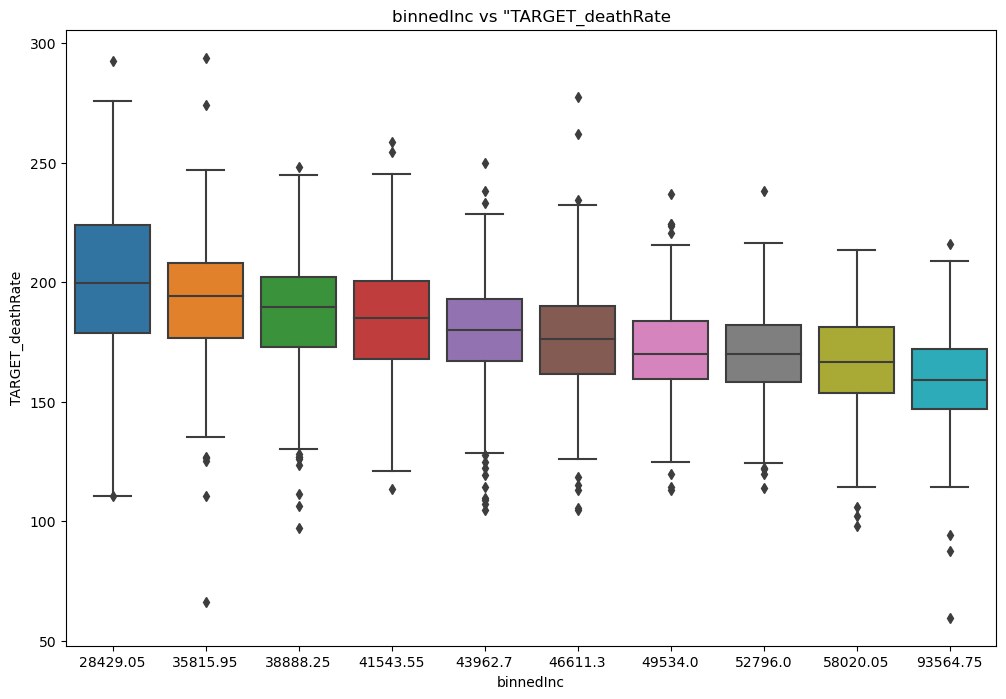

In [7]:
# Boxplot of "binnedInc" vs "TARGET_deathRate"
plt.figure(figsize=(12, 8))
sns.boxplot(data=cancer_df, x='binnedInc', y='TARGET_deathRate', width=0.8)
plt.title('binnedInc vs "TARGET_deathRate')
plt.show()

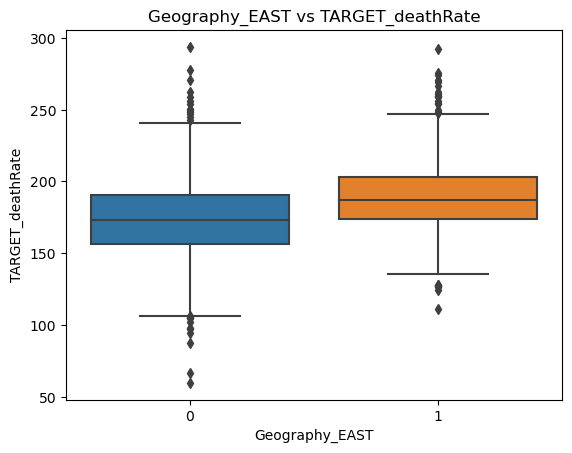

In [8]:
# Boxplot of "Geography_EAST" vs "TARGET_deathRate"
sns.boxplot(data=cancer_df, x='Geography_EAST' , y='TARGET_deathRate')
plt.title('Geography_EAST vs TARGET_deathRate')
plt.show()

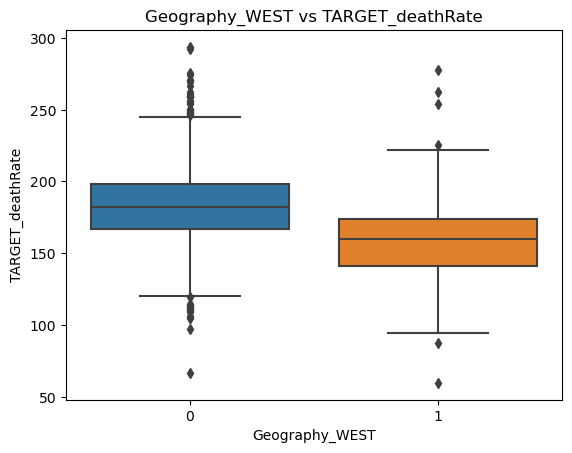

In [9]:
# Boxplot of "Geography_WEST" vs "TARGET_deathRate"
sns.boxplot(data=cancer_df, x='Geography_WEST' , y='TARGET_deathRate')
plt.title('Geography_WEST vs TARGET_deathRate')
plt.show()

There seems to be some linear correlation between the categorical variables and the target variable.

## 4. CORRELATION MATRIX

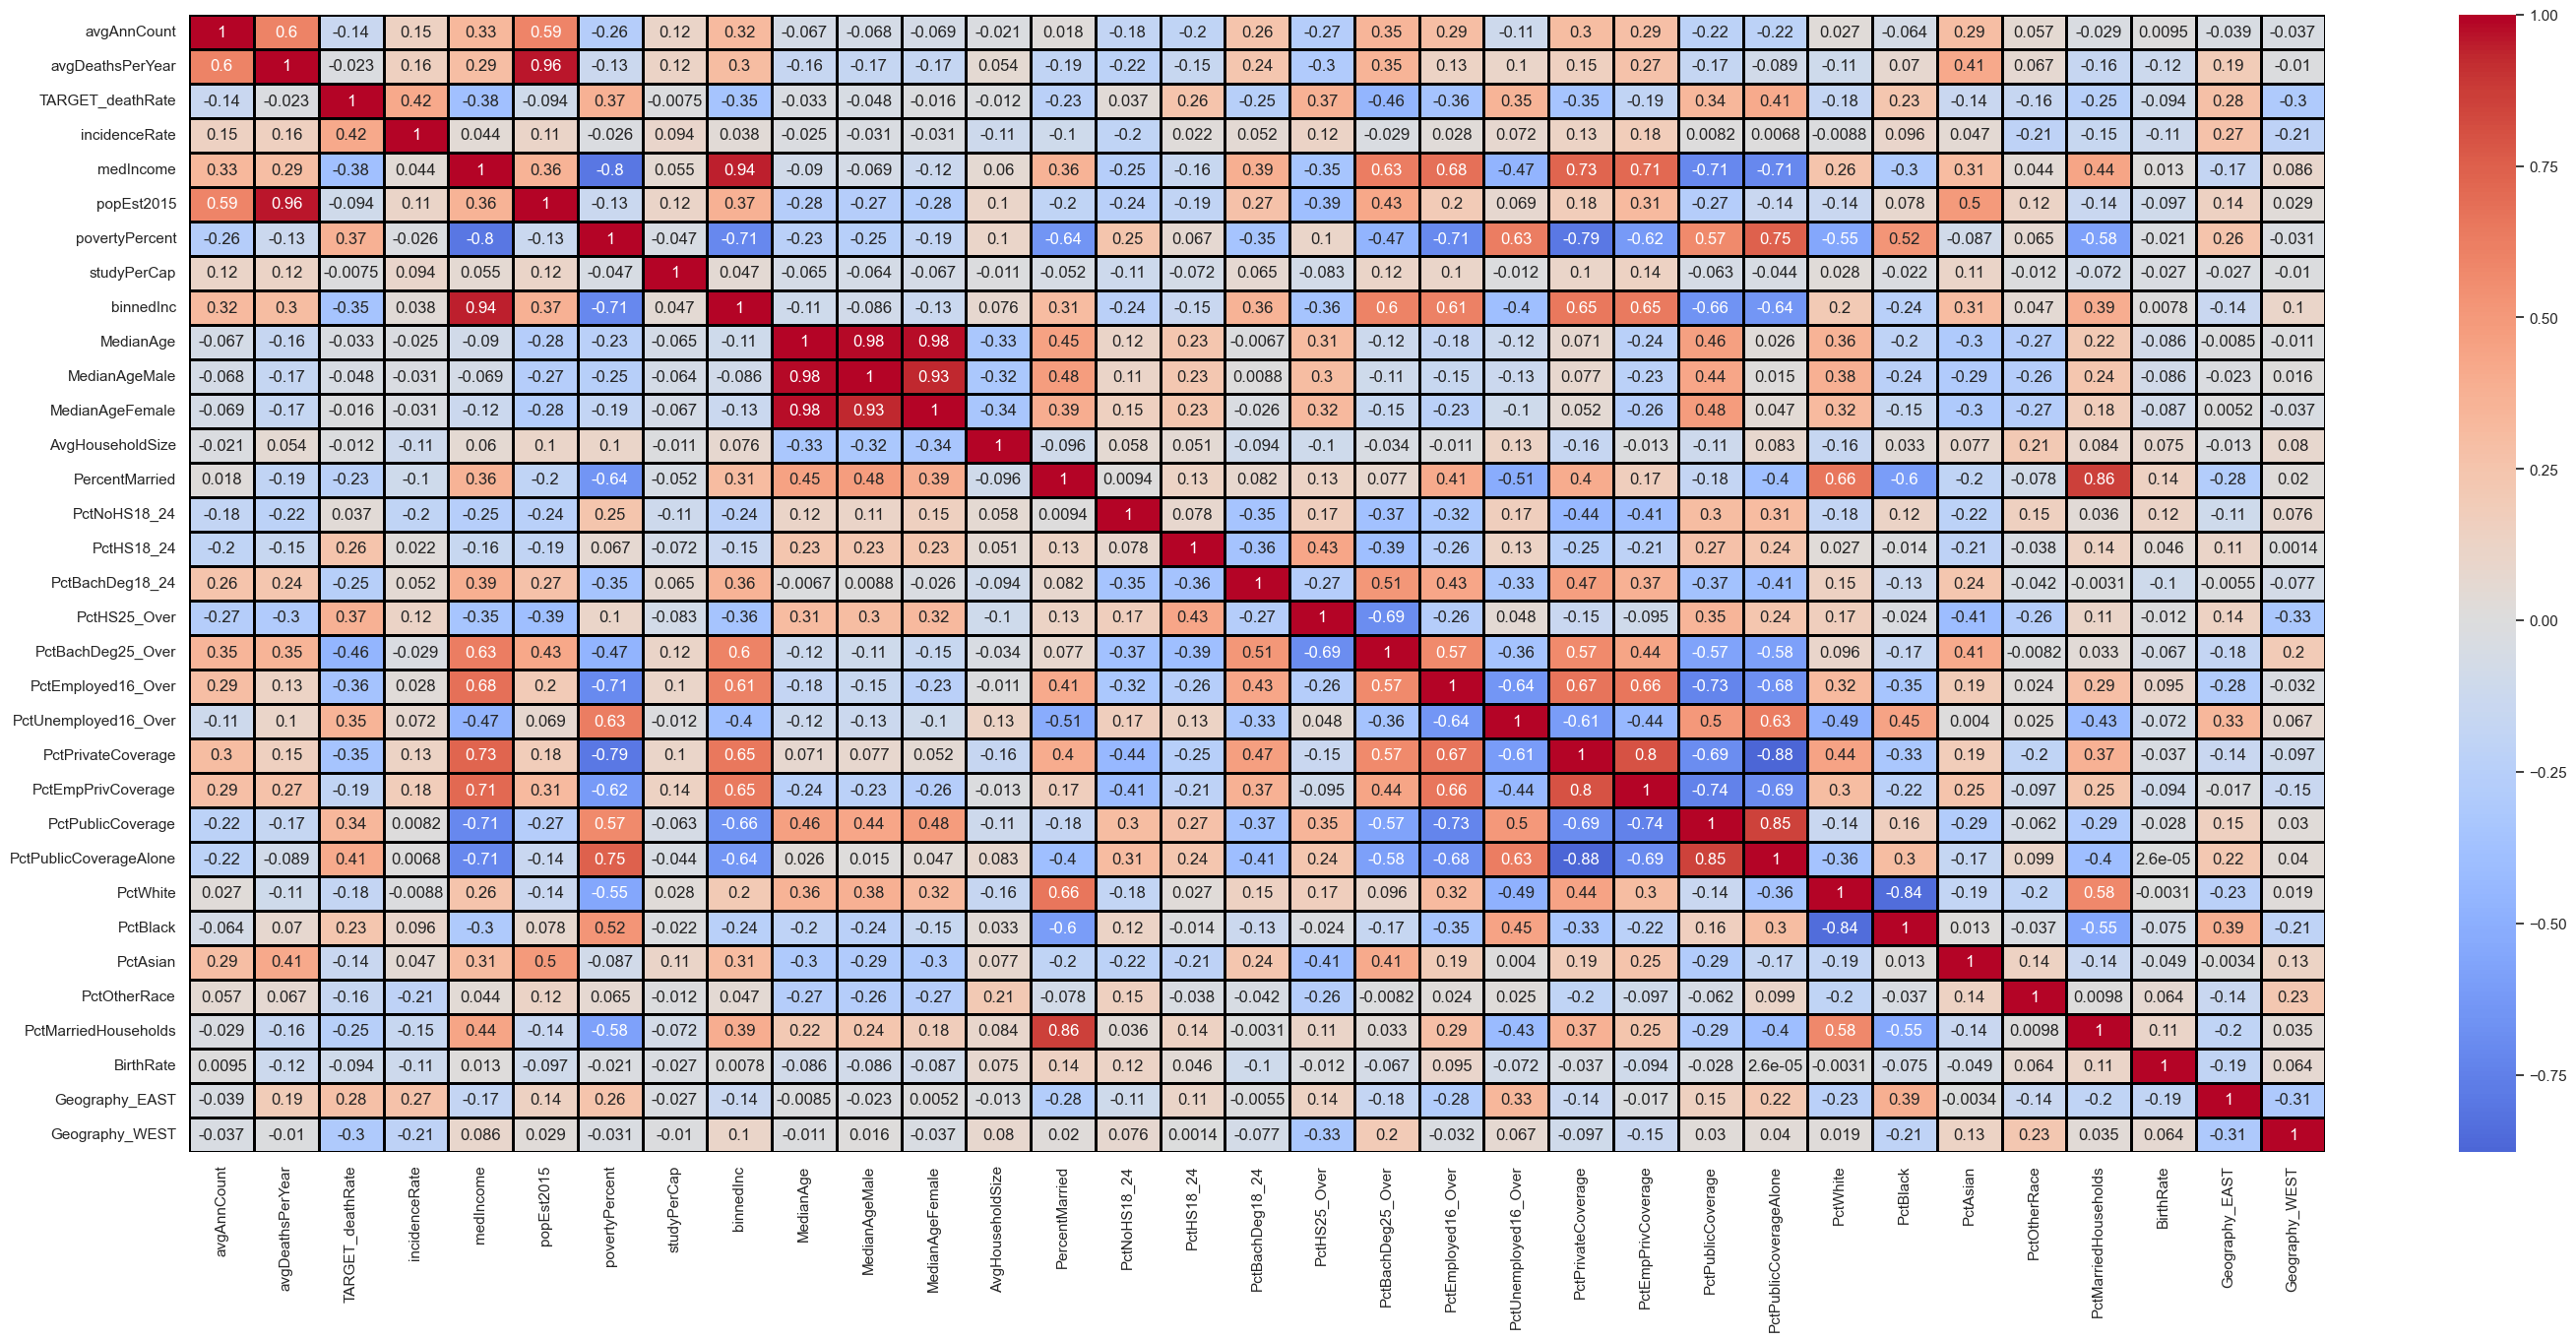

In [10]:
# Function that displays correlation matrix

def display_corr(dataframe):
    sns.set(rc = {'figure.figsize':(35,15)})
    sns.heatmap(data = dataframe.corr(),
          annot = True,
         fmt = '.2g',
         center = 0,
          cmap = 'coolwarm',
          linewidths = 1, linecolor = 'black')

display_corr(cancer_df)

Upon inpection, we can see that some of the variables are correlated greatly. In order to address this issue, we are going to either use machine learning methods that are resistant to correlation or use PCA.

## 5. PCA (DIMENSIONS' REDUCTION)

We are going use pca to reduce the dimensions of the dataset. To find the "optimal" number of components, we are going to try out a range of components and calculate the explained variance ratio of each try.

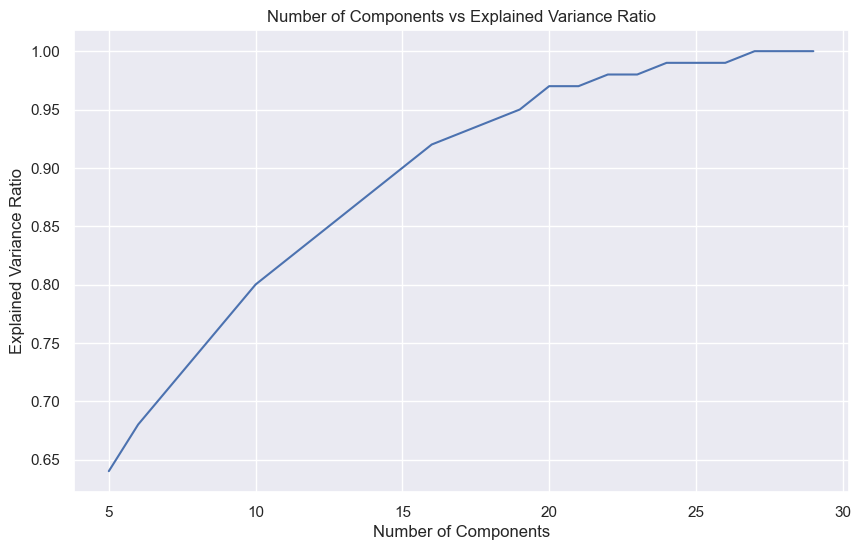

In [11]:
# First we import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# We define X and Y, and we scale X
X = cancer_df.drop(columns = 'TARGET_deathRate')
Y = cancer_df[ 'TARGET_deathRate']
X_sc = StandardScaler().fit_transform(X)

# Create empty lists for line plot
Number_of_components =[]
Explained_Variance_Ratio = []

# Get number of components and explained variance ratio
for i in range(5, 30):
    pca = PCA(n_components=i)
    X_pca = pca.fit(X_sc)
    Number_of_components.append(i)
    Explained_Variance_Ratio.append(round(sum(X_pca.explained_variance_ratio_),2))
    
# We create a line plot 
plt.figure(figsize=(10, 6))
plt.plot(Number_of_components,Explained_Variance_Ratio)
plt.title('Number of Components vs Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

We decide the "optimal" number of components to be equal to 20

## 6. TRAIN-TEST SPLIT

Lastly we will split the dataset into a train dataset and a test dataset

In [12]:
# First we shuffle the dataframe
cancer_df = cancer_df.sample(axis= 0, frac = 1, random_state=126)
cancer_df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
398,104.0,46,170.4,401.9,38504,22633,21.5,0.000000,38888.25,34.0,...,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
89,20.0,10,187.4,400.6,43883,3091,12.1,0.000000,43962.70,49.5,...,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0
222,575.0,235,181.3,480.2,47185,73486,16.2,136.080342,46611.30,50.1,...,45.6,21.0,88.089285,0.917165,1.480724,0.821857,47.163245,5.956138,0,1
2402,46.0,19,181.3,475.5,46501,6205,13.1,0.000000,46611.30,43.7,...,37.6,17.5,95.879607,0.209239,0.611621,1.738291,55.575802,5.024311,0,0
1739,954.0,327,146.5,397.9,89861,309697,4.9,129.158500,93564.75,36.1,...,14.8,6.2,87.621825,3.568358,5.348661,0.907175,62.297581,5.756462,0,0


In [13]:
# Approximately the 10% of the dataset
test_df = cancer_df[0:244]

In [14]:
train_df = cancer_df[244:]

In [15]:
# Saving the datasets
test_df.to_csv(r'test_dataset.csv', index=False)
train_df.to_csv(r'train_dataset.csv', index=False)